In [ ]:
'''

원핫인코딩: 공간 낭비 심함, 단어의 의미 파악 불가,

밀집벡터(Dense): 0,1 값이 아닌, 실수 형태로 값 표현. 공간낭비 심하지 않음, 저차원 공간에 임베딩.

'''

'\n\n원핫인코딩: 공간 낭비 심함, 단어의 의미 파악 불가,\n밀집벡터(Dense): 0,1 값이 아닌, 실수 형태로 값 표현. 공간낭비 심하지 않음, 저차원 공간에 임베딩.\n\n\n\n'

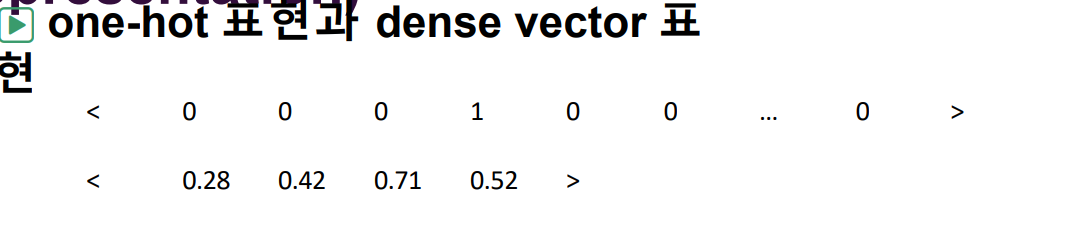


<br>
원핫, 벡터 차이

<br>

Word2Vector 연구(대량의 말뭉치 벡터로 표현):
<br>
Skip-Gram 모델, Continuous Bag Of Words(CBOW) 모델

<br>
<br>

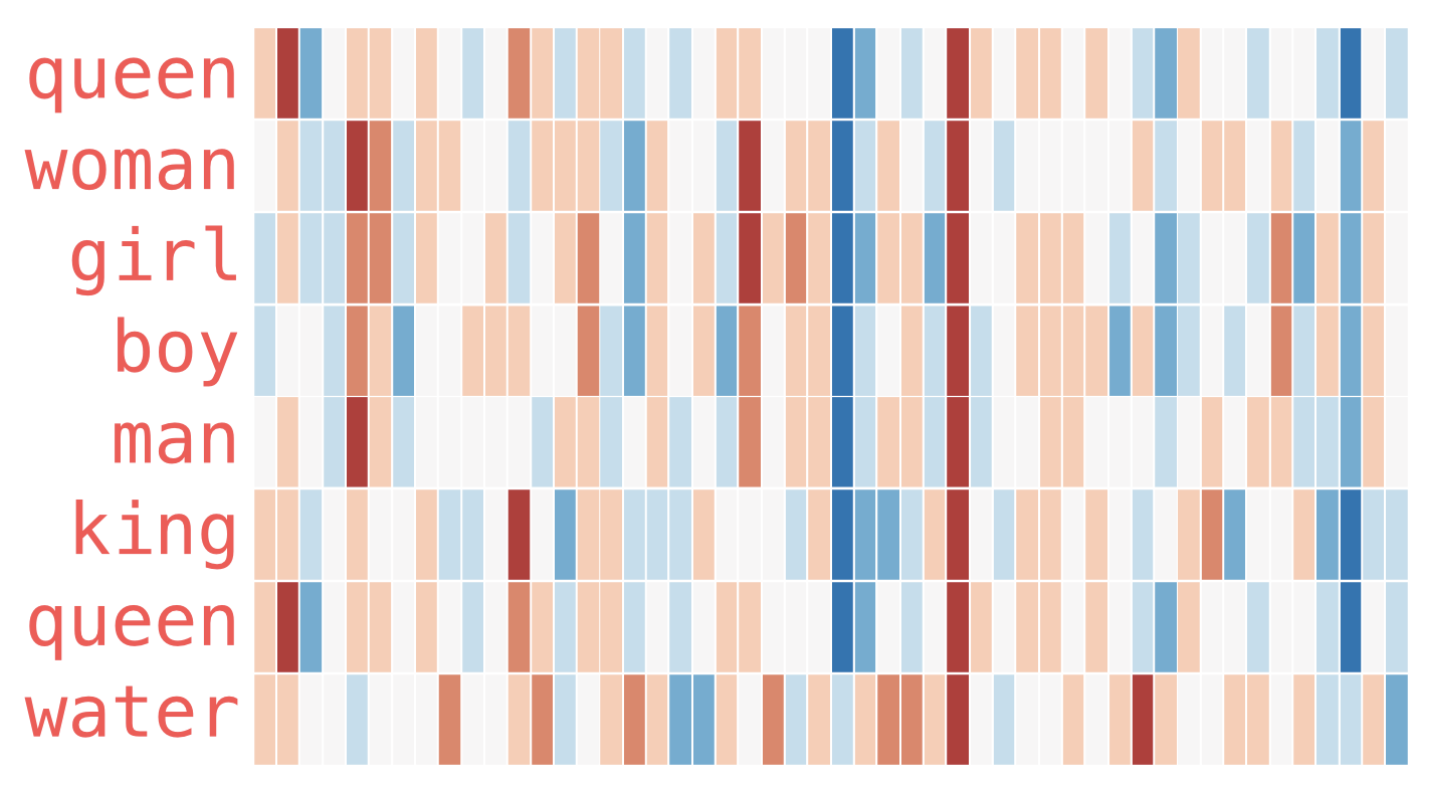

<br>
벡터로 표현하면, 그 단어의 정보, 의미, 관계를 알 수 있다.

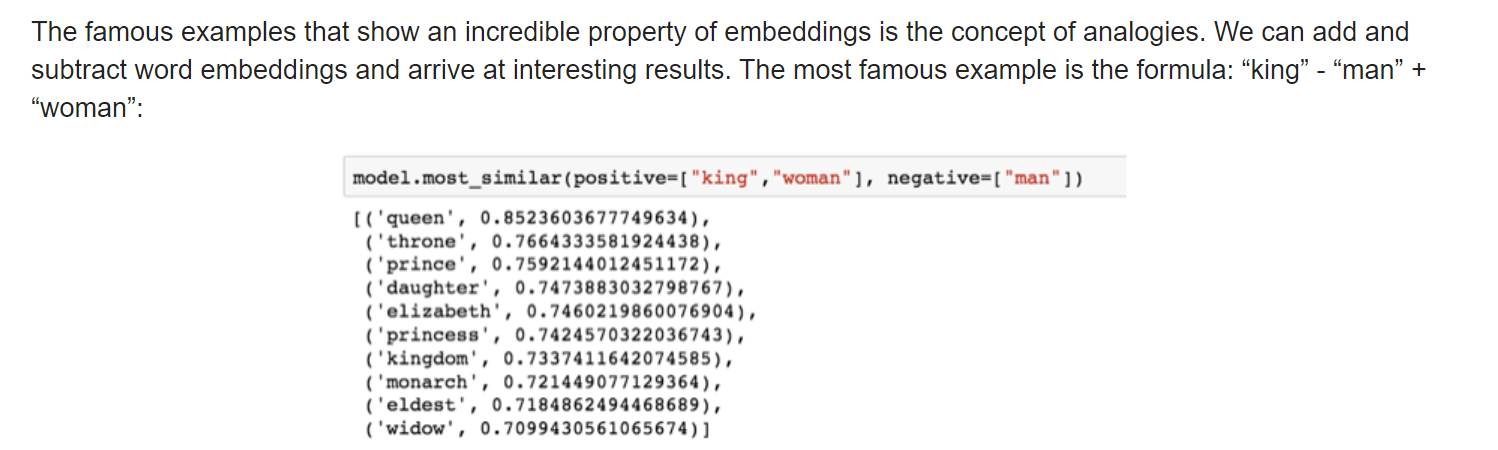

슬라이딩 윈도우 방식: 단어 처음에 지정해준 개수만큼, 계속 한칸씩 밀면서 예측하는 것.

http://jalammar.github.io/illustrated-word2vec/

<br>

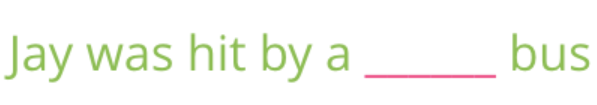

<br>
요딴 식으로 앞에서 차례로 가는거만 있는게 아니고, 뒤에서도 같이 반영하는 느낌도 있다.(양방향)

https://radimrehurek.com/gensim/     => pretrained model

In [ ]:
import re
import urllib.request # 그냥 크롤링 할때, selenium과 같은 역할

In [ ]:
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml",
                           filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7e1bebe1cee0>)

In [ ]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.

result = [word_tokenize(sentence) for sentence in normalized_text] # word_tokenize가 단어 단위로 쪼개라.

In [ ]:
result

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'],
 ['facit', 'was', 'a', 'fantastic', 'company'],
 ['they',
  'were',
  'born',
  'deep',
  'in',
  'the',
  'swedish',
  'forest',
  'and',
  'they',
  'made',
  'the',
  'best',
  'mechanical',
  'calculators',
  'in',
  'the',
  'world'],
 ['everybody', 'used', 'them'],
 ['and',
  'what',
  'did',
  'facit',
  'do',
  'when',
  'the',
  'electronic',
  'calcu

In [ ]:
import numpy as np

In [ ]:
np.shape(result)
len(result) # 단어개수 27만개 넘는다.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


273424

In [ ]:
result[0]

['here',
 'are',
 'two',
 'reasons',
 'companies',
 'fail',
 'they',
 'only',
 'do',
 'more',
 'of',
 'the',
 'same',
 'or',
 'they',
 'only',
 'do',
 'what',
 's',
 'new']

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0) #window가 왼쪽 5개, 오른쪽 단어 5개 보겠다
# min_count =  5가

In [ ]:
model.wv.most_similar('man') # 'man' 벡터랑 가장 가까운 벡터.

[('woman', 0.8554669618606567),
 ('guy', 0.8204485774040222),
 ('lady', 0.7742944359779358),
 ('boy', 0.7709559202194214),
 ('girl', 0.7572479844093323),
 ('gentleman', 0.7481610178947449),
 ('soldier', 0.7392329573631287),
 ('kid', 0.7023948431015015),
 ('poet', 0.6951226592063904),
 ('friend', 0.6574634909629822)]

In [ ]:
# 한국어 Word2Vec 모델 생

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt") # 사람들 영화 후기 text파일로 모아둔 것.

('ratings.txt', <http.client.HTTPMessage at 0x7e1bcab100a0>)

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_table('/content/ratings.txt') # DataFrame형태로 변환.

In [ ]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
train_data[train_data['document'].isnull()] #NaN값 너무 많아서
train_data = train_data.dropna(how = 'any')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [ ]:
train_data['document'].str.replace('포켓','포겟') # 앞 괄호 바뀔 문자열, 뒤에가 바꿀 문자열.
# 앞에 str로 받아준게, 원래는 시리즈 형태여서 str붙여줘야 전부 바뀜.

0                                       어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1         디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                      폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3         와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                               안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
                                ...                        
199995                                       포겟 몬스터 짜가 ㅡㅡ;;
199996                                                쓰.레.기
199997                    완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.
199998                  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 199992, dtype: object

In [ ]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '') #이상한 특수기호 싹다 지우기. 뒤에 빈 '' 이게 없앤다.

# [^ㄱ-ㅎ ㅏ-ㅣ 가-힣] ^이거가 부정표시.

<ipython-input-21-5e3c3fe3f98e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]', '') #이상한 특수기호 싹다 지우기. 뒤에 빈 '' 이게 없앤다.
<ipython-input-21-5e3c3fe3f98e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]', '') #이상한 특수기호 싹다 지우기. 뒤에 빈 '' 이게 없앤다.


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.2 MB/s eta 0:00:00


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] # 불용어 모음

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model.wv.vectors.shape ### 벡터로 바꿔준거 형태 확인.

In [ ]:
model.wv.most_similar('컴퓨터')
model.wv.most_similar('책상')
model.wv.most_similar('부모')

In [ ]:
from gensims.models import FastText # 그냥 위에 Word2Vec 에서 쫌 더 진보된 모델 # BERT 쓰자.

In [ ]:
FastText(result, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

In [ ]:
model.wv.most_similar('man')

[('woman', 0.8554669618606567),
 ('guy', 0.8204485774040222),
 ('lady', 0.7742944359779358),
 ('boy', 0.7709559202194214),
 ('girl', 0.7572479844093323),
 ('gentleman', 0.7481610178947449),
 ('soldier', 0.7392329573631287),
 ('kid', 0.7023948431015015),
 ('poet', 0.6951226592063904),
 ('friend', 0.6574634909629822)]

In [ ]:
### 딥러닝 실습

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [ ]:
#스팸메일은 분류 문제. 그래서 마지막 셀에서만 출력 하면 됨.(예측이 아니다.)

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
### data 열 이름 바꾸자

data.columns



Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# 열 이름 이상한거 날리기

del data['Unnamed: 2']
del data['Unnamed: 4']
del data['Unnamed: 3']

In [ ]:
data['v1']=data['v1'].replace(['ham','spam'],[0,1]) #spam을 1로, ham을 0으로
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
data.columns = ['label', 'title']

In [ ]:
data.info()
data.describe
data.label.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   title   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


0    4825
1     747
Name: label, dtype: int64

In [ ]:
## 중복제거

data['title'].nunique()

5169

In [ ]:
data.drop_duplicates(subset=['title'], inplace=True)

In [ ]:
len(data['title']) #중복 제거하고 몇개 날라갔는지 확인.

5169

In [ ]:
#### 지리는 연구: meta learning, few shot learning(추천)

In [ ]:
ydata = data['label']
xdata = data['title']

In [ ]:
# 층화추출: 종류에 맞춰서 균등 분리 후 추출.

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.2, random_state = 42, stratify = ydata)

In [ ]:
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))

4135
1034
4135
1034


In [ ]:
len(ytest)
xtrain.iloc[0]
xtest.iloc[0]

'Good morning, my Love ... I go to sleep now and wish you a great day full of feeling better and opportunity ... You are my last thought babe, I LOVE YOU *kiss*'

In [ ]:
xtrain

336     Cool. So how come you havent been wined and di...
390                             Huh so late... Fr dinner?
583     my ex-wife was not able to have kids. Do you w...
1387    Hope ur head doesn't hurt 2 much ! Am ploughin...
1095                              Ryder unsold.now gibbs.
                              ...                        
606     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
105     Thanks a lot for your wishes on my birthday. T...
3789    I love you !!! You know? Can you feel it? Does...
1911    Lol grr my mom is taking forever with my presc...
3742    Nah, Wednesday. When should I bring the mini c...
Name: title, Length: 4135, dtype: object

In [ ]:
ytrain.value_counts()

0    3613
1     522
Name: label, dtype: int64

In [ ]:
# 단어 전처리 (모델 성능 개선되게)

In [ ]:
tok = Tokenizer()

tok.fit_on_texts(xtrain) # 원래는 train_test_split 분리 안한거로 해야한다(전체 dataset으로)
xtrain_enc = tok.texts_to_sequences(xtrain)

In [ ]:
xtrain_enc

[[281, 23, 44, 60, 3, 469, 107, 3487, 7, 3488, 180],
 [556, 23, 218, 752, 316],
 [12, 854, 583, 61, 24, 397, 2, 16, 1160, 30, 3, 67, 1160, 74, 65],
 [127,
  37,
  619,
  620,
  621,
  17,
  113,
  62,
  3489,
  12,
  142,
  925,
  4,
  3490,
  15,
  3491,
  855,
  8,
  38,
  4,
  3492,
  201,
  60,
  1018,
  33,
  3,
  55],
 [3493, 1335, 22, 2318],
 [304,
  213,
  663,
  160,
  8,
  160,
  77,
  123,
  77,
  4,
  1802,
  8,
  3494,
  28,
  557,
  5,
  512,
  9],
 [46, 558, 181, 6, 584, 139, 492, 140],
 [166, 294, 57, 108, 24, 71, 76, 47, 316],
 [424, 1336, 1019, 622, 623],
 [84,
  664,
  624,
  512,
  1,
  339,
  16,
  1161,
  12,
  1803,
  1162,
  2,
  267,
  1,
  268,
  35,
  1804,
  3495,
  513,
  33,
  1,
  31,
  74,
  121,
  19,
  27,
  24,
  3496,
  20,
  753],
 [63, 699, 24, 2, 100, 97, 74, 33, 23, 754, 11, 10, 94, 94, 94],
 [1,
  2319,
  3,
  21,
  4,
  514,
  379,
  7,
  27,
  276,
  24,
  2,
  35,
  4,
  1163,
  1,
  16,
  2,
  31,
  124,
  1337,
  1518,
  5,
  142,
  7,
  57

In [ ]:
#tok.index_word
w2i = tok.word_index

# 두개 차이 확인.

In [ ]:
w2i

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'for': 11,
 'my': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 '2': 17,
 'that': 18,
 'call': 19,
 'on': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'not': 24,
 'but': 25,
 'can': 26,
 "i'm": 27,
 'or': 28,
 'at': 29,
 'do': 30,
 'get': 31,
 'will': 32,
 'if': 33,
 'we': 34,
 'be': 35,
 'just': 36,
 'ur': 37,
 'with': 38,
 'no': 39,
 'this': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 'how': 44,
 'when': 45,
 'ok': 46,
 '4': 47,
 'from': 48,
 'out': 49,
 'go': 50,
 'what': 51,
 'all': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'got': 56,
 'then': 57,
 'good': 58,
 'time': 59,
 'come': 60,
 'was': 61,
 'am': 62,
 'he': 63,
 'its': 64,
 'day': 65,
 'there': 66,
 'want': 67,
 'text': 68,
 'only': 69,
 'love': 70,
 'going': 71,
 'send': 72,
 'lor': 73,
 'one': 74,
 'by': 75,
 'home': 76,
 'as': 77,
 'need': 78,
 'still': 79,
 'txt': 80,
 'see': 81,
 'about': 82,
 'r': 83,
 'stop': 84,
 'our

In [ ]:
len(w2i)

7815

In [ ]:
xtrain.shape #4135
xtest.shape #1034

(1034,)

In [ ]:
type(xtrain_enc)

list

In [ ]:
map(len, xtrain_enc) # xtrain_enc데이터에 len함수 적용해라

In [ ]:
sum(map(len, xtrain_enc)) / len(xtrain_enc) #그냥 계산한걸 단순하게 변수 느낌으로 받아준거라 생각하자.

15.514631197097945

In [ ]:
max(map(len, xtrain_enc)) # 메일의 최대 단어개수
print(max(len(s) for s in xtrain_enc)) #교수 어버버 해서 그냥 어거지로 넣은 코드

min(map(len, xtrain_enc))
print(min(len(s) for s in xtrain_enc))

121
0


In [ ]:
maxLen=max(len(s) for s in xtrain_enc)

In [ ]:
xtrain_padded=pad_sequences(xtrain_enc, maxlen=maxLen)

In [ ]:
xtrain_padded.shape

(4135, 121)

In [ ]:
vocab_size = len(w2i) +1 # 그냥 W2i 크기 맞춰서 그 크기를 변수로.(0패딩 넣었어서 +1 해줘야 한다.)
vocab_size

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(vocab_size, 32)) #LSTM 올라가기 전에 각 output값 싹다 32차원 맞춰준다는 말.
model.add(SimpleRNN(100))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(xtrain_padded, ytrain, epochs = 5, batch_size = 32, validation_split = 0.2)

Epoch 1/5


104/104 [==============================] - 9s 57ms/step - loss: 0.4713 - accuracy: 0.8011 - val_loss: 0.3688 - val_accuracy: 0.8791
Epoch 2/5
104/104 [==============================] - 5s 45ms/step - loss: 0.3861 - accuracy: 0.8724 - val_loss: 0.3745 - val_accuracy: 0.8791
Epoch 3/5
104/104 [==============================] - 7s 64ms/step - loss: 0.3853 - accuracy: 0.8724 - val_loss: 0.3726 - val_accuracy: 0.8791
Epoch 4/5
104/104 [==============================] - 5s 50ms/step - loss: 0.3853 - accuracy: 0.8724 - val_loss: 0.3717 - val_accuracy: 0.8791
Epoch 5/5
104/104 [==============================] - 7s 65ms/step - loss: 0.3846 - accuracy: 0.8724 - val_loss: 0.3690 - val_accuracy: 0.8791


In [ ]:
### 인제 test 해본다.

xtest_enc = tok.texts_to_sequences(xtest)

In [ ]:
xtest_padded = pad_sequences(xtest_enc, maxlen = maxLen)

In [ ]:
#model.predict(xtest_padded) # 입력 데이터에 대한 예측 값을 반환

model.evaluate(xtest_padded, ytest) # 손실(loss)과 정확도(accuracy)를 반환

33/33 [==============================] - 2s 49ms/step - loss: 0.3801 - accuracy: 0.8733


[0.38006269931793213, 0.8733075261116028]

In [ ]:
model.evaluate(xtest_padded, ytest)[1]

33/33 [==============================] - 1s 25ms/step - loss: 0.3801 - accuracy: 0.8733


0.8733075261116028

In [ ]:
# 길이 0인거 날리고, 불용어 추가하고, xtrain으로만 받아줬던거 전체 데이터로 확장.